In [1]:
#All the imports
from __future__ import print_function
import pandas as pd
import numpy as np
from numpy import genfromtxt
from math import sqrt
import math
import random
from sklearn import metrics
import matplotlib.pyplot as plt
from random import randrange
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from operator import itemgetter
import time

## Imports and Loading Data
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import operator

In [2]:
data = pd.read_csv(r'C:\Users\14436\Desktop\CSE 587 - DIC\Assignment1\data.csv', header = None)

y = data.iloc[:, 48].values

x = data.loc[:, 0:47]
x = (x - x.min()) / (x.max() - x.min()) * 20    #Min-max normalization
x.reset_index(drop=True)

x = x.iloc[:, 0:47].values


#Performing sanity check by printing all the "shape(s)":
print("x.shape = ", x.shape)
print("y.shape = ", y.shape)

x.shape =  (40957, 47)
y.shape =  (40957,)


In [3]:
#Performing sanity check by printing all the "shape(s)":
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x_train.shape = ", x_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_train.shape = ", y_train.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (32765, 47)
x_test.shape =  (8192, 47)
y_train.shape =  (32765,)
y_test.shape =  (8192,)


# PART - 1: Implementation of Machine Learning Algorithms

In [6]:
def Accuracy(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    
    """
    accuracy = (np.sum(y_true == y_pred) / len(y_true)) * 100
    return accuracy

def Recall(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    confusion_matrix = ConfusionMatrix(y_true, y_pred)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 1)
    result = np.mean(recall)
    return result

def Precision(y_true,y_pred):
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    confusion_matrix = ConfusionMatrix(y_true, y_pred)
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis = 0)
    result = np.mean(precision)
    return result

def WCSS(clusters, centroids):
    """
    :Clusters List[numpy.ndarray]
    :rtype: float
    """
    my_wcss = 0
    no_of_clusters = len(clusters)
    for cluster in range(no_of_clusters):
        my_wcss += np.sum((clusters[cluster] - centroids[cluster, :]) ** 2) 
    return my_wcss

def ConfusionMatrix(y_test,y_pred):
    
    """
    :type y_true: numpy.ndarray
    :type y_pred: numpy.ndarray
    :rtype: float
    """
    number_of_classes = 11
    data = (y_test * number_of_classes) + y_pred
    x = number_of_classes**2
    result = np.histogram(data,bins = np.arange(12,x+13))[0]
    result = result.reshape((number_of_classes,number_of_classes))
    
    return result

### KNN FROM SCRATCH

In [ ]:
def KNN(X_train, X_test, Y_train):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: numpy.ndarray
    """
    
    #Defining K here (manually)...
    k = 20
    
    return np.array([find_neighbors(x, X_train, Y_train, k) for x in X_test])

def find_neighbors(x_test, x_train, y_train, k):
    # Calculating Eucledian Distance:
    difference_matrix_ed = (np.tile(x_test, (x_train.shape[0], 1)) - x_train) ** 2
    euclidian_distances = difference_matrix_ed.sum(axis=1) ** 0.5
    sorted_euclidian_distances = euclidian_distances.argsort()

    # Defining what class the datapoint belongs to:
    class_counter = {}
    for i in range(k):
        majority_label = y_train[sorted_euclidian_distances[i]]
        class_counter[majority_label] = class_counter.get(majority_label, 0) + 1

    return sorted(class_counter.items(), key=itemgetter(1), reverse=True)[0][0]

In [ ]:
""" PRINTING THE ACCURACY OF KNN """

start_time = time.time()

predictions = KNN(x_train, x_test, y_train)

print("KNN From Scratch - accuracy = ", Accuracy(y_test, predictions), "%")

print("--- TIME = %s seconds ---" % (time.time() - start_time))

### RANDOM FOREST FROM SCRATCH

In [ ]:
class RForest:
    def __init__(self, sampleSize, n_trees,n_features, maxDepth,partitions,minSize):
        self.maxDepth = maxDepth
        self.partitions = partitions
        self.minSize = minSize
        self.sampleSize = sampleSize
        self.n_trees = n_trees
        self.n_features = n_features
        self.dt = DecisionTree(self.maxDepth,
                            self.partitions,
                            self.minSize,
                            self.n_features)
        
    def RandomForest(self,train_set, test_set):
        trees = list()
        np.random.seed(11)
        for i in range(self.n_trees):
            #sample = self.subsample(train_set)
            sample = list()
            #n_sample = round(len(dataset) * self.sampleSize)
            n_sample = round(len(dataset) /self.sampleSize)
            while len(sample) < n_sample:
                index = randrange(len(dataset))
            #print(index)
                sample.append(dataset[index])
        
            tree = self.dt.buildDecisionTree(sample)
            trees.append(tree)
        predictions = [self.baggingPredict(trees, row) for row in test_set]
        #print(predictions)
        actual = np.array(test_set)[:,len(test_set[0])-1]
        #accuracy,Precision,Recall,F1_Score = self.dt.evaluatePerformance(actual, predictions) 
        accuracy = self.dt.evaluatePerformance(actual, predictions)
        
        print(accuracy)
        #return Accuracy,Precision,Recall,F1_Score
   
    # Make a prediction with a list of bagged trees
    def baggingPredict(self,trees, row):
        predictions = [self.dt.predict(tree, row) for tree in trees]
        return max(set(predictions), key=predictions.count)

    
    
class DecisionTree:
    def __init__(self, maxDepth,partitions,minSize,n_features = None):
        self.maxDepth = maxDepth
        self.partitions = partitions
        self.minSize = minSize
        self.n_features = n_features
         
    # Calculate accuracy percentage
    def calculateAccuracyMetrics(self,actual, predicted):
        correct = 0
        for i in range(len(actual)):
            if actual[i] == predicted[i]:
                correct += 1
        return correct / float(len(actual)) * 100.0
    
    def evaluatePerformance(self,y_test, predictedLabelList):
      
        #data = {'Predicted': predictedLabelList ,
        #        'Actual':  y_test  
        #       }

        #print(data)
        #df = pd.DataFrame(data, columns=['Actual','Predicted'])
        correct = 0
        
        for i in range(len(y_test)):
            if y_test[i] == predictedLabelList[i]:
                correct+= 1
                
        #Accuracy = correct / float(len(y_test)) * 100.0
        #print(Accuracy)
        
        accuracy = Accuracy(y_test,predictedLabelList)
        precission = Recall(y_test,predictedLabelList)
        recall = Precision(y_test,predictedLabelList)
        
        #Accuracy=(tp+tn)/(tp+tn+fp+fn)*100
        
       #Precision=(tp)/(tp+fp)
       #Recall=(tp)/(tp+fn)
       #F1_Score= 2*((Recall*Precision)/(Recall + Precision))
        #print("TP:",tp," TN:",tn," FN:",fn," FP:",fp)
       #return Accuracy,Precision,Recall,F1_Score
        return Accuracy
    # Evaluate an algorithm using a cross validation split
    def fit(self,train_set,test_set):
        predicted = self.getDecisionTree(train_set, test_set)
        actual = np.array(test_set)[:,len(test_set[0])-1]
        Accuracy,Precision,Recall,F1_Score = self.evaluatePerformance(actual, predicted)
        return Accuracy,Precision,Recall,F1_Score
    
    # Split a dataset based on an attribute and an attribute value
    def doRandomSplit(self,index, value, dataset):
        left = []
        right = []
        _ = [left.append(row) if row[index] < value else right.append(row) for row in dataset]
        ##print(row[index]) 
        ##print(value)
        return left, right
    
    # Calculate the Gini index for a split dataset
    def calGiniIndex(self,groups, labels):
        # total gives the summation of all the instances combining all groups
        total = float(sum([len(group) for group in groups]))
        # initialise gini to zero
        gini = 0.0
        for group in groups:
            # gives the elements belonging to each of the group
            group_size = float(len(group))
            # ignores if the size is 0
            if group_size == 0:
                continue
            # initializing score to zero
            score = 0.0
            for label in labels:
                # calculate the score for each of the data split
                p = [row[-1] for row in group].count(label) / group_size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (group_size / total)
        return gini
    
    # Select the best split point for a dataset
    def findBestSplit(self,dataset):
        # list pf different labels in the last column of the data
        labels = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        if self.n_features == None:
            for index in range(len(dataset[0])-1):
                for row in dataset:
                    groups = self.doRandomSplit(index, row[index], dataset)
                    gini = self.calGiniIndex(groups, labels)
                    if gini < b_score:
                        #When selecting the best split and using it as a new node for the tree we will
                        #store the index of the chosen attribute, the value of that attribute by 
                        #which to split and the two groups of data split by the chosen split point
                        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
                                 
        else:
            features = list()
            while len(features) < self.n_features:
                index = randrange(len(dataset[0])-1)
                if index not in features:
                    features.append(index)
                                  
            for index in features:
                for row in dataset:
                    groups = self.test_split(index, row[index], dataset)
                    gini = self.calGiniIndex(groups, labels)
                    if gini < b_score:
                        #When selecting the best split and using it as a new node for the tree we will
                        #store the index of the chosen attribute, the value of that attribute by 
                        #which to split and the two groups of data split by the chosen split point
                        b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        #print(b_groups)
        return {'index':b_index, 'value':b_value, 'groups':b_groups, 'gini':b_score}
    
    # Create a terminal node value
    def leaf(self,group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)
    
    # Create child splits for a node or make leaf
    def split(self,node,depth):
        # the two groups of data split by the node are extracted for use
        left, right = node['groups']
        # check for a no split
        # if either the left group or the right group is empty then we assign it as the leaf node
        if not left or not right:
            node['left'] = node['right'] = self.leaf(left + right)
            return
        # check for max depth if the max depth is reached we agian create the leaf node
        if depth >= self.maxDepth:
            node['left'], node['right'] = self.leaf(left), self.leaf(right)
            return
        # We check if the the group of rows is too small . If it is too small then we again assign it as a leaf node
        if len(left) <= self.minSize:
            node['left'] = self.leaf(left)
        else:
        # if non of the conditions satisfy we recursively split the node in a similar fashion.
            node['left'] = self.findBestSplit(left)
            self.split(node['left'],depth+1)
        # We check if the number of rows in each group is too small include it as aleaf node
        if len(right) <= self.minSize:
            node['right'] = self.leaf(right)
        else:
        # if non of the above conditions satisfy we recursively split the data again
            node['right'] = self.findBestSplit(right)
            self.split(node['right'], depth+1)
     
    # Split a dataset based on an attribute and an attribute value
    def test_split(self,index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    # Build a decision tree
    def buildDecisionTree(self,train):
        root = self.findBestSplit(train)
        self.split(root, 1)
        #print("\n ***********Decision Tree***********\n")
        #print('Best Split for Feature%d < %.3f Gini=%.3f' % ((root['index']+1), root['value'], root['gini']))
        #print("\n")
        #self.printTree(root,self.maxDepth)
        
        return root
    
    # Make a prediction with a decision tree
    def predict(self,node, row):
        #We must check if a child node is either a terminal value to be returned as the prediction, 
        #or if it is a dictionary node containing another level of the tree to be considered.
        if row[node['index']] < node['value']:
            # checks if the object is an instance of another instance
            if isinstance(node['left'], dict):
                return self.predict(node['left'], row)
            else:
                return node['left']
        else:
            # checks if the object is an instance of another instance
            if isinstance(node['right'], dict):
                return self.predict(node['right'], row)
            else:
                return node['right']
            
    # Classification and Regression Tree Algorithm
    def getDecisionTree(self,train, test):
        tree = self.buildDecisionTree(train)
        predictions = list()
        for row in test:
            prediction = self.predict(tree, row)
            predictions.append(prediction)
        return(predictions)
    
    # Print a decision tree
    def printTree(self,node, depth=0,level=0):
        if isinstance(node, dict):
            print('%s%s%d%s[Feature %d < %.3f]' % ((depth*' ','Level ',level+1,':', (node['index']+1), node['value'])))
            self.printTree(node['left'], depth+1,level+1)
            self.printTree(node['right'], depth+1,level+1)
        else:
            print('%s[%s]' % (((depth+7)*' ', node)))
            
# Split a dataset into n partitions so that we can calculate the cost based on different splits
def doCrossValidation(dataset,partitions):
    splits = list()
    datasetCopy = list(dataset)
    chunkSize = len(datasetCopy) // partitions
    leftOver = len(datasetCopy) % partitions
    start = 0
    for i in range(partitions):
        if i < leftOver:
            end = start + chunkSize + 1
        else:
            end = start + chunkSize
        splits.append(datasetCopy[start:end])
        start = end
    return splits 
def convertToFloat(sequence):
    for item in sequence:
        try:
            yield float(item)
        except ValueError as e:
            yield item
accuracy = []
precision = []
recall = []
fmeasure = []
np.random.seed(11)

original_data = pd.read_csv('D:\Projects\cse587 2020\Project1\Assignment1\data.csv',header=None)
#original_data = pd.read_csv(r'C:\Users\14436\Desktop\CSE 587 - DIC\Assignment1\data.csv', nrows = 1000, header=None)

#print(original_data.iloc[0])
obj_df = original_data.select_dtypes(include=['object']).copy()
obj_df = obj_df.apply(LabelEncoder().fit_transform)
for col in obj_df:
    original_data[col] = obj_df[col]
#print(original_data.iloc[0])
dataset = original_data.values

simpleRFData = dataset
numPartitions = 10
maxDepth = 15
minimumSize = 1
sampleSize = 250
n_features = int(math.sqrt(len(dataset[0])-1))
n_trees = 180

np.random.seed(11)
np.random.shuffle(simpleRFData)
lent = len(dataset)
trrows = math.floor(0.8*lent)
train_set = simpleRFData[0:trrows]

test_set = simpleRFData[trrows:len(simpleRFData)-1]

rf = RForest(sampleSize, n_trees,n_features, maxDepth,numPartitions,minimumSize)
#Accuracy,Precision,Recall,F1_Score = rf.RandomForest(train_set,test_set)

rf.RandomForest(train_set,test_set)

### PCA FROM SCRATCH

In [ ]:
def PCA(X_train, N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: numpy.ndarray
    """
    k = X_train.shape[1];
    Center_val = X_train - np.mean(X_train.T, axis=1)
    Covariance_val = np.cov(Center_val.T)
    
    values, vectors = np.linalg.eigh(Covariance_val)
    
    eig_pairs = [(np.abs(values[i]), vectors[:,i]) for i in range(len(values))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    
    matrix_w = np.hstack(eig_pairs[i][1].reshape(k, 1) for i in range(N))
    
    return X_train.dot(matrix_w)

In [ ]:
""" DISPLAYING REDUCED DIMENSIONS GENERATED BY PCA """

start_time = time.time()
reduced_dims = PCA(x_train,2)
print("\nThe Reduced Dimensions are: \n", reduced_dims)
print("--- TIME = %s seconds ---" % (time.time() - start_time))

### K-MEANS CLUSTERING FROM SCRATCH

In [ ]:
def Kmeans(X_train,N):
    """
    :type X_train: numpy.ndarray
    :type N: int
    :rtype: List[numpy.ndarray]
    """
    k = N
    n = x_train.shape[0]
    c = x_train.shape[1]
    
    mean = np.mean(x_train, axis = 0)
    std = np.std(x_train, axis = 0)
    
    print(k)
    print(n)
    print(c)
    print(std)
    print(mean)
    centers = np.random.randn(k, c) * std + mean
    
    centers_old = np.zeros(centers.shape)
    centers_new = deepcopy(centers)
    
    clusters = np.zeros(n)
    distances = np.zeros((n, k))
    
    error = np.linalg.norm(centers_new - centers_old)
    
    while error != 0:
        for i in range(k):
            distances[:,i] = np.linalg.norm(x_train - centers[i], axis=1)
        clusters = np.argmin(distances, axis=1)
        centers_old = deepcopy(centers_new)
        for i in range(k):
            centers_new[i] = np.mean(x_train[clusters == i], axis = 0)
        error = np.linalg.norm(centers_new - centers_old)
    return centers_new

In [ ]:
""" DISPLAYING CENTERS GENERATED BY K-MEANS CLUSTERING """

start_time = time.time()
centers = Kmeans(x_train,4)
print("\n Centers = \n", centers)
print("--- TIME = %s seconds ---" % (time.time() - start_time))

# PART - 2: Scikit-Learn Pipeline for Machine Learning

### Supervised Learning Algorithms


SVM Accuracy: 86.09619140625 %
Time =  29.307512521743774 seconds
Confusion matrix for SVM
[[618   0   0   0   0  92   0   0   8   0   0]
 [  0 640   0   0   1   0   0   0   0  80   0]
 [  0   0 704   0  56   0   0   0   0   0   0]
 [  0   0  60 701   5   0   0   0   0   0   0]
 [  0   0  40  62 510   0   0 148   0   0   0]
 [ 72   0   7   0   0 548   0   0 100   0   0]
 [  0   0   0   0   0   0 738   0   0   0   0]
 [  1   0   3  11 138   0   0 588   0   0   0]
 [ 28   4   2   0   0 140   0   0 564   1   0]
 [  0  79   0   0   0   0   0   0   0 688   0]
 [  0   0   0   0   0   0   0   0   0   0 754]]



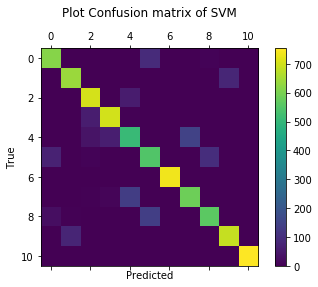

[0.8609619140625, 0.89111328125, 0.8956298828125, 0.8973388671875, 0.89892578125, 0.9012451171875]


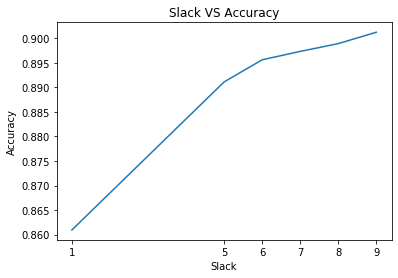


KNN Accuracy: 41.2353515625 %
Time =  13.758541584014893 seconds
Confusion matrix for KNN
[[331  78  58  25  51  88   3  30  39  15   0]
 [ 99 292  48  16  30  74   4  16  50  90   2]
 [143  63 341  26  50  41  11  31  23  31   0]
 [ 69  50  77 289  96  37  26  83  24  15   0]
 [130  49  57 107 237  50  13  78  22  17   0]
 [158  91  50  29  59 188   2  51  67  31   1]
 [ 39  22  64  69  51  11 446  22   6   8   0]
 [ 93  48  51 108  98  74  13 191  56   8   1]
 [107  77  29  43  50 120   3  82 206  20   2]
 [ 84 200  73  21  26  65   2  10  42 239   5]
 [ 31  48   7   5   1   7   1   5  15  16 618]]



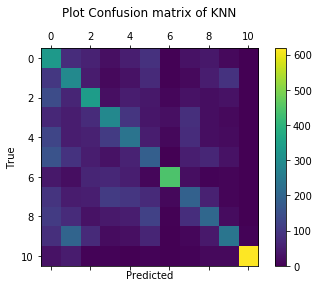

[0.4058837890625, 0.412353515625, 0.4188232421875, 0.4183349609375, 0.422607421875, 0.425048828125]


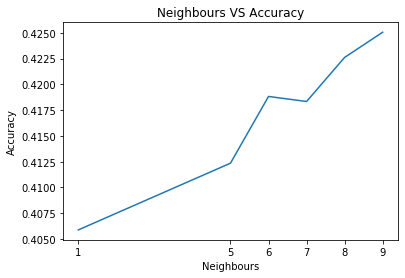

C:\Users\14436\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\14436\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)



Logistic Regression Accuracy: 72.30224609375 %
Time =  12.499292612075806 seconds
Confusion matrix for Logistic Regression
[[331  78  58  25  51  88   3  30  39  15   0]
 [ 99 292  48  16  30  74   4  16  50  90   2]
 [143  63 341  26  50  41  11  31  23  31   0]
 [ 69  50  77 289  96  37  26  83  24  15   0]
 [130  49  57 107 237  50  13  78  22  17   0]
 [158  91  50  29  59 188   2  51  67  31   1]
 [ 39  22  64  69  51  11 446  22   6   8   0]
 [ 93  48  51 108  98  74  13 191  56   8   1]
 [107  77  29  43  50 120   3  82 206  20   2]
 [ 84 200  73  21  26  65   2  10  42 239   5]
 [ 31  48   7   5   1   7   1   5  15  16 618]]



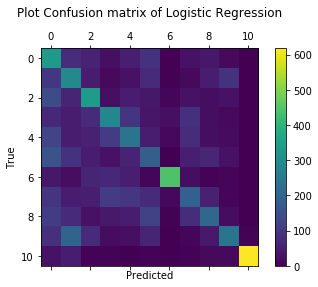


Decision Tree Accuracy: 98.05908203125 %
Time =  1.7185652256011963 seconds
Confusion matrix for Decision Tree
[[331  78  58  25  51  88   3  30  39  15   0]
 [ 99 292  48  16  30  74   4  16  50  90   2]
 [143  63 341  26  50  41  11  31  23  31   0]
 [ 69  50  77 289  96  37  26  83  24  15   0]
 [130  49  57 107 237  50  13  78  22  17   0]
 [158  91  50  29  59 188   2  51  67  31   1]
 [ 39  22  64  69  51  11 446  22   6   8   0]
 [ 93  48  51 108  98  74  13 191  56   8   1]
 [107  77  29  43  50 120   3  82 206  20   2]
 [ 84 200  73  21  26  65   2  10  42 239   5]
 [ 31  48   7   5   1   7   1   5  15  16 618]]



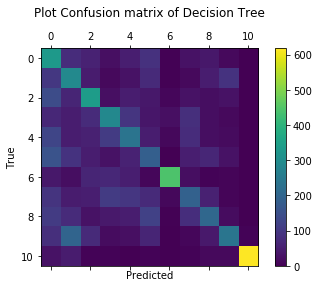

[0.575927734375, 0.818603515625, 0.9195556640625, 0.961181640625, 0.9749755859375, 0.9801025390625, 0.9814453125, 0.980712890625, 0.9820556640625, 0.9815673828125, 0.98046875, 0.9801025390625]


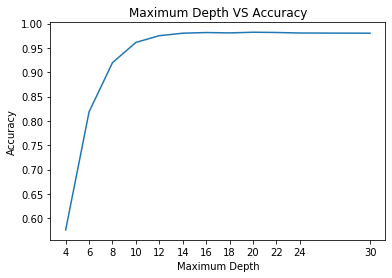

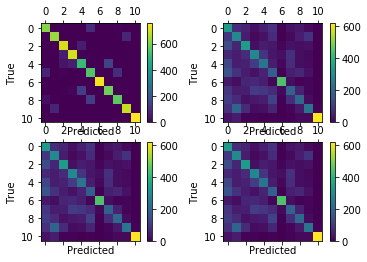

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
def SklearnSupervisedLearning(x_train, y_train, x_test, y_test):
    """
    :type X_train: numpy.ndarray
    :type X_test: numpy.ndarray
    :type Y_train: numpy.ndarray
    
    :rtype: List[numpy.ndarray] 
    """
    
    ### SVM - using Scikit Learn
    # 1 - Accuracy
    start_time = time.time()
    svm = SVC(kernel = 'linear', C = 1).fit(x_train, y_train)
    svm_prediction = svm.predict(x_test)
#     accuracy = svm.score(x_test, y_test)
    accuracy = accuracy_score(y_test, svm_prediction)
    print("\nSVM Accuracy: {} %".format(accuracy*100))
    print("Time =  %s seconds" % (time.time() - start_time))
    
    # 2 - Confusion Matrix
    svm_cm = ConfusionMatrix(y_test,svm_prediction)
    print('Confusion matrix for SVM')
    print(svm_cm)
    print()
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(svm_cm) 
    plt.title('Plot Confusion matrix of SVM\n') 
    fig.colorbar(cax) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
    
    # 3 - Grid Search
    c_list = [1,5,6,7,8,9]
    scores_list = []
    for c in c_list:
        svm_1 = SVC(kernel='linear', C = c).fit(x_train,y_train)
        svm_prediction_1 = svm_1.predict(x_test)
        scores_list.append(accuracy_score(y_test, svm_prediction_1))
    print(scores_list)
    plt.plot(c_list,scores_list)
    plt.xticks(c_list)
    plt.title('Slack VS Accuracy')
    plt.xlabel('Slack') 
    plt.ylabel('Accuracy') 
    plt.show()
    
    
    
    ### KNN - using Scikit Learn
    # 1 - Accuracy
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
    knn_prediction = knn.predict(x_test)
    accuracy = knn.score(x_test, y_test)
    print("\nKNN Accuracy: {} %".format(accuracy*100))
    print("Time =  %s seconds" % (time.time() - start_time))
    
    # 2 - Confusion Matrix
    knn_cm = ConfusionMatrix(y_test,knn_prediction)
    print('Confusion matrix for KNN')
    print(knn_cm)
    print()
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(knn_cm) 
    plt.title('Plot Confusion matrix of KNN\n') 
    fig.colorbar(cax) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
    
    # 3 - Grid Search
    knn_list = [1,5,6,7,8,9]
    scores_list = []        
    for k in knn_list:
        knn_1 = KNeighborsClassifier(n_neighbors = k)
        knn_1.fit(x_train, y_train)
        knn_prediction_1 = knn_1.predict(x_test)
        scores_list.append(accuracy_score(y_test, knn_prediction_1))
    print(scores_list)
    plt.plot(knn_list,scores_list)
    plt.xticks(knn_list)
    plt.title('Neighbours VS Accuracy')
    plt.xlabel('Neighbours') 
    plt.ylabel('Accuracy') 
    plt.show()
    
    
    ### Logistic Regression - using Scikit Learn
    # 1 - Accuracy
    start_time = time.time()
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    lr_prediction = lr.predict(x_test)
    score = lr.score(x_test, y_test)
    print("\nLogistic Regression Accuracy: {} %".format(score*100))
    print("Time =  %s seconds" % (time.time() - start_time))
    
    # 2 - Confusion Matrix
    lr_cm = ConfusionMatrix(y_test,knn_prediction)
    print('Confusion matrix for Logistic Regression')
    print(lr_cm)
    print()
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(lr_cm) 
    plt.title('Plot Confusion matrix of Logistic Regression\n') 
    fig.colorbar(cax) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
    
    
   
    ### Decision Tree - using Scikit Learn
    # 1 - Accuracy
    start_time = time.time()
    dt = tree.DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    dt_prediction = dt.predict(x_test)
    score = accuracy_score(y_test, dt_prediction)
    print("\nDecision Tree Accuracy: {} %".format(score*100))
    print("Time =  %s seconds" % (time.time() - start_time))
    
    # 2 - Confusion Matrix
    dt_cm = ConfusionMatrix(y_test,knn_prediction)
    print('Confusion matrix for Decision Tree')
    print(dt_cm)
    print()
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(dt_cm) 
    plt.title('Plot Confusion matrix of Decision Tree\n') 
    fig.colorbar(cax) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
    
    # 3 - Grid Search  
    depth_list = [4,6,8,10,12,14,16,18,20,22,24,30]
    scores_list = []
    for d in depth_list:
        dt = tree.DecisionTreeClassifier(max_depth=d)
        dt = dt.fit(x_train, y_train)
        dt_prediction = dt.predict(x_test)
        scores_list.append(accuracy_score(y_test, dt_prediction))
    print(scores_list)
    plt.plot(depth_list,scores_list)
    plt.xticks(depth_list)
    plt.title('Maximum Depth VS Accuracy')
    plt.xlabel('Maximum Depth') 
    plt.ylabel('Accuracy') 
    plt.show()
    
    
    fig = plt.figure() 

    fig_1 = fig.add_subplot(221) 
    cfig_1 = fig_1.matshow(svm_cm)  
    fig.colorbar(cfig_1) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 

    fig_2 = fig.add_subplot(222)
    cfig_2 = fig_2.matshow(knn_cm)
    fig.colorbar(cfig_2) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 

    fig_3 = fig.add_subplot(223)
    cfig_3 = fig_3.matshow(lr_cm)
    fig.colorbar(cfig_3)
    plt.xlabel('Predicted') 
    plt.ylabel('True') 

    fig_4 = fig.add_subplot(224)
    cfig_4 = fig_4.matshow(dt_cm)
    fig.colorbar(cfig_4) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
    
    
    # Ensemble models - SklearnVotingClassifier method implementation
#     ensemble_model = [('svm', svm_prediction),('knn', knn_prediction), ('log_reg', lr_prediction), ('Dec_tree', dt_prediction)]
    ensemble_model = [('knn', knn_prediction), ('log_reg', lr_prediction), ('Dec_tree', dt_prediction),('svm', svm_prediction)]
    ense = VotingClassifier(ensemble_model, voting='hard')
    ense.fit(x_train,y_train)
    prediction_ensemble = ense.predict(x_test)
    print("Ensemble (KNN, Logistic Regression, Decision Tree, SVM) Accuracy:", accuracy_score(y_test, prediction_ensemble))
    print()
    
    print()
    confusion_matrix = confusion_matrix1(y_test,prediction_ensemble)
    print('Confusion matrix for Ensemble model')
    print()
    print(confusion_matrix)
    print()
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(confusion_matrix) 
    plt.title('Confusion matrix of Ensemble model') 
    fig.colorbar(cax) 
    plt.xlabel('Predicted') 
    plt.ylabel('True') 
    plt.show()
    
    
SklearnSupervisedLearning(x_train, y_train, x_test, y_test)

# Reference:
# https://intellipaat.com/community/1611/sklearn-plot-confusion-matrix-with-labels

In [ ]:
SklearnSupervisedLearning(x_train, y_train, x_test, y_test)